This Notebook showcases some data analysis done on a text file downloaded from the Web and provides a set of practice exercises.

In [5]:
#Import all required packages
import requests
import nltk
nltk.download('punkt')
#Force utf8 as the character encoding
import codecs 
#numpy is a package for numeric computing
import numpy as np

#nltk is a package for working with text
#conda install nltk
#Also see: http://www.nltk.org/book/
#To download ready-to-use nltk datasets run in your shell: python -m nltk.downloader all
#You need the nltk.corpus.stopwords.words('english') for this code to run
import nltk

#matplotlib is for plotting and nice visualisations
import matplotlib
%matplotlib inline

#Package re is for regular expressions
import re 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Archie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
#Get a text file.
#Get book "Alice's Adventures in Wonderland" from Project Gutenberg, in text format
#Store text content to a file named alice.txt

url='http://www.gutenberg.org/cache/epub/11/pg11.txt'
text_page = requests.get(url).text
with codecs.open("alice.txt", "w", "utf8") as file:
    file.write(text_page)
#Look at the text_page object
#?text_page

#Look at the first 5000 characters of the book
print(text_page[:5000])

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictur

# Example of Descriptive Analysis

In [7]:
#Open the file where we stored the book "Alice's Adventures in Wonderland"
#Load data into object text
with open('alice.txt', 'r') as file:
    text = file.read()

#Example of Descriptive Analysis
#How many chapters does the book have?
#Ignore the first element at index 0 which is the pre-face, 
#not a chapter. See book structure.
chapters = text.split("CHAPTER")[1:]
chapter_lengths = [len(ch) for ch in chapters]

min_chapter_length = len(min(chapters, key=len))
max_chapter_length = len(max(chapters, key=len))

avg_chapter_length = sum(chapter_lengths)/len(chapters)
#Can use numpy for numeric computations such as mean, standard deviation
numpy_avg_chapter_length = np.mean(chapter_lengths)
stdev_chapter_length = np.std(chapter_lengths)

#?nchapters
print("Number of chapters: ", len(chapters))
print("Chapter lengths: ", chapter_lengths)
print("Min chapter length: ", min_chapter_length)
print("Max chapter length: ", max_chapter_length)
print("Avg chapter length: ", avg_chapter_length)
print("Numpy Avg chapter length: ", numpy_avg_chapter_length)
print("Deviation from avg chapter length: ", stdev_chapter_length)



Number of chapters:  12
Chapter lengths:  [11453, 10989, 9552, 13871, 11986, 13860, 12688, 13656, 12618, 11528, 10380, 30430]
Min chapter length:  9552
Max chapter length:  30430
Avg chapter length:  13584.25
Numpy Avg chapter length:  13584.25
Deviation from avg chapter length:  5246.15718288158


# Example of Exploratory Analysis

Number of sentences:  1744
Number of words:  36903


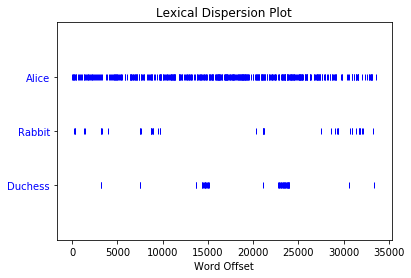

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Archie/nltk_data'
    - 'C:\\Users\\Archie\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Archie\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Archie\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Archie\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [8]:
#Open the file where we stored the book "Alice's Adventures in Wonderland"
#Load data into object text
with open('alice.txt', 'r') as file:
    text = file.read()

#Example of Exploratory Analysis
#Where in the text do given words occur? (visualisation)
#What are the top-20 most frequent words in this book? (summarization)
sentences = nltk.sent_tokenize(text)
words = nltk.word_tokenize(text)
#print(words[:10])
print("Number of sentences: ", len(sentences))
print("Number of words: ", len(words))

#Turn the text into an nltk object Text
alice = nltk.Text(words)
#?alice
#Where in the text do given words occur? (visualisation)
alice.dispersion_plot(["Alice", "Rabbit", "Duchess"])

# Remove all punctuation from word lists - note the use of regular expressions!
#\W Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].
#For more details: https://docs.python.org/3/howto/regex.html
alice = [w for w in alice if not (re.match(r'^\W+$', w) != None)]

# Convert all words to lower case
alice = [w.lower() for w in alice]

# Remove all stop words from word lists
alice = [w for w in alice if not w in nltk.corpus.stopwords.words('english')]
#print(alice[:10])

word_frequency = nltk.FreqDist(alice)
# #?word_frequency
#What are the top-10 most frequent words in this book?
print("\nMost frequent top-10 words: ", word_frequency.most_common(10))
word_frequency.plot(10)
word_frequency = nltk.FreqDist(alice)
# #?word_frequency
#What are the top-10 most frequent words in this book?
print("\nMost frequent top-10 words: ", word_frequency.most_common(10))
word_frequency.plot(10)

# Practice Exercises

Practice downloading files from the Internet, doing some preliminary data analysis and extracting new knowledge from them. Below you are given a set of exercises requesting you to download PDF files, extract their text content and do some analysis using the text. You can do this using other types of data of your own interest (e.g., news articles in HTML format). We work with PDF here because many reports are released in PDF format (e.g., http://www.publicpolicy.ie/download-center/downloads-by-theme/) and it is useful to know how to extract their content and work with it with the aim to extract new knowledge.

## Problem Setup
In February 2016, the Irish General Elections took place. Many of the participating political parties released their political program (aka manifestos) ahead of the election, in PDF formats. At the URL below you can find a sample of such reports. 
Please do the following:

1. For two Irish political parties of your own choice, search and download the files containing their General Elections 2016 political manifesto (i.e., political plan). A few manifestos available online in pdf format are given at this link: [GE16 Party Manifestos](https://drive.google.com/drive/folders/0B0F5ayfFxHc7Y2xBOE5uY1VzSFE?usp=sharing)
    
2. Extract the text content from the two files, and save it to two different text files on your computer.

3. Using the text of each political manifesto, compute and print descriptive statistics: 
    - print the first 500 characters of the text, 
    - print the total number of sentences and the shortest and the longest sentence, 
    - print the total number of words and the ratio of unique words to total number of words, 
    - print the most frequent 20 words.
    
4. For each text file containing the political manifesto:
    - remove the punctuation from the text, transform all words to lower case and remove the stop words,
    - print the first 500 characters of the cleaned text,
    - print the top-20 most frequent words in the cleaned text, 
    - on the cleaned text, use a dispersion plot to show the coverage of different issues in the two manifestos, where the issues are: "abortion", "crime", "debt", "economy", "environment", "health", "housing", "infrastructure" , "jobs", "tax".

5. Choose two different methods of summarising and contrasting the two political manifestos to give a better understanding of the characteristics and focus of each. Discuss the advantages and disadvantages of the methods proposed.